<a href="https://colab.research.google.com/github/smruti0301/data-science-exp/blob/main/exp10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#wrapper feature selection

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the Iris dataset (You can replace this with your own dataset)
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Display the first few rows of the dataset
X.head(), y.head()

(   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                5.1               3.5                1.4               0.2
 1                4.9               3.0                1.4               0.2
 2                4.7               3.2                1.3               0.2
 3                4.6               3.1                1.5               0.2
 4                5.0               3.6                1.4               0.2,
 0    0
 1    0
 2    0
 3    0
 4    0
 dtype: int64)

In [ ]:
# Create a RandomForest model
rf_model = RandomForestClassifier()

# Perform 5-fold cross-validation to evaluate the model
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

# Display cross-validated accuracy
print(f"RandomForest Cross-validated accuracy: {cv_scores.mean():.3f}")


RandomForest Cross-validated accuracy: 0.967


Feature Importances:
             Feature  Importance
3   petal width (cm)    0.445583
2  petal length (cm)    0.434367
0  sepal length (cm)    0.095055
1   sepal width (cm)    0.024995


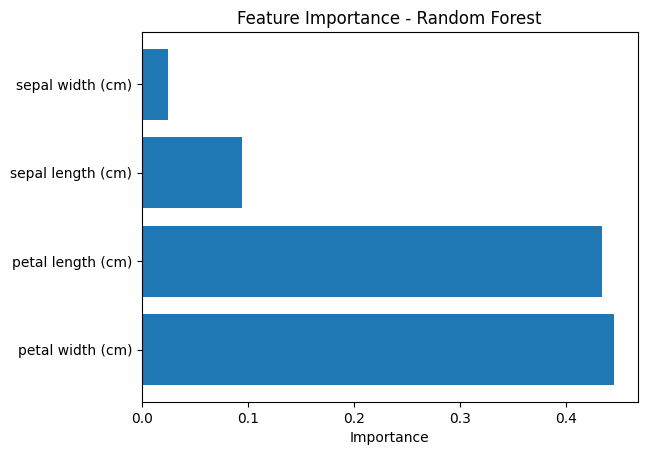

In [ ]:
# Fit the RandomForest model to the entire dataset
rf_model.fit(X, y)

# Get feature importance from the trained model
importances = rf_model.feature_importances_

# Create a DataFrame to hold feature names and importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print("Feature Importances:")
print(feature_importance_df)

# Visualize feature importances
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.show()


In [ ]:
#Handle Multicollinearity using Variance Inflation Factor (VIF)

In [ ]:
# Calculate VIF to check for multicollinearity
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display features with high VIF (indicating multicollinearity)
print("VIF values:")
print(vif_data[vif_data['VIF'] > 5])  # Typically VIF > 5 indicates multicollinearity

VIF values:
             Feature         VIF
0  sepal length (cm)  262.969348
1   sepal width (cm)   96.353292
2  petal length (cm)  172.960962
3   petal width (cm)   55.502060


In [ ]:
# Initialize Recursive Feature Elimination (RFE) with RandomForest model
rfe = RFE(estimator=rf_model, n_features_to_select=2)  # Choose how many features to select
rfe.fit(X, y)

# Get the selected features
selected_features = X.columns[rfe.support_]
print(f"Selected features from RFE: {selected_features.tolist()}")

Selected features from RFE: ['petal length (cm)', 'petal width (cm)']


In [ ]:
#Evaluate Final Model on Selected Features

In [ ]:
# Train and evaluate the final model using only the selected features from RFE
final_rf_model = RandomForestClassifier()

# Perform 5-fold cross-validation using only the selected features
final_scores = cross_val_score(final_rf_model, X[selected_features], y, cv=5, scoring='accuracy')

# Display final model cross-validated accuracy
print(f"Final Model with selected features Cross-validated accuracy: {final_scores.mean():.3f}")


Final Model with selected features Cross-validated accuracy: 0.967
